In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



path = '../../data/telco-customer-churn.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)

In [ ]:
#usamos la funcion convert_dtypes() para convertirlas al tipo correcto
df = df.convert_dtypes()

#se encontraron valores vacios en la columna TotalCharges
valores_vacios = df[df['TotalCharges'].str.strip() == '']
print(f"Cantidad de valores vacíos: {len(valores_vacios)}")

#convierte la columna 'TotalCharges' a valores numéricos, reemplazando errores con 0.0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0.0)


df.info()



Cantidad de valores vacíos: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   Int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBi

## Limpieza de datos

#1. Manejo de datos duplicados

In [2]:
# Conteo e identificacion de valores duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()
# Se encuentra que no existen valores duplicados en el dataset

Número de registros duplicados: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#2. Comparacion de tipos de datos contra el diccionario de datos

In [3]:
df.info()
df.head()
# Se verifica que casi todas las columnas excepto las numericas son del tipo generico object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#usamos la funcion convert_dtypes() para convertirlas al tipo correcto
df = df.convert_dtypes()

#se encontraron valores vacios en la columna TotalCharges
valores_vacios = df[df['TotalCharges'].str.strip() == '']
print(f"Cantidad de valores vacíos: {len(valores_vacios)}")

#convierte la columna 'TotalCharges' a valores numéricos, reemplazando errores con 0.0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0.0)


df.info()



Cantidad de valores vacíos: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   Int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBi

#3. Identificar y solucionar inconsistencias en valores categoricos

In [5]:
# (Codigo desarrollado y explicado en clase por el profesor)

def create_yes_no_converter(serie):
    """
    Crea una función de conversión yes/no a boolean solo si toda la serie
    contiene exclusivamente valores 'yes' o 'no'.
    
    Parameters:
    -----------
    serie : serie a analizar
        
    Returns:
    --------
    function
        Función de conversión si todos los valores son 'yes'/'no'
        None si la serie contiene otros valores
    """
    # Verificar si todos los valores son 'yes' o 'no'
    if all(x in ['yes', 'no'] for x in serie):
        def converter(x):
            if pd.isna(x):
                return pd.NA
            return bool(x == 'yes')
        return converter
    else:
        return None  # Retornamos None si la columna no es convertible

def convert_yes_no_columns(df):
    """
    Convierte todas las columnas que contengan exclusivamente 'yes'/'no' a boolean.
    """
    df_result = df.copy()
    
    # Procesar solo columnas de tipo string/object
    str_columns = df.select_dtypes(include=['object']).columns
    
    for col in str_columns:
        # Crear el convertidor específico para la columna
        converter = create_yes_no_converter(df[col])
        
        # Si existe un convertidor, aplicarlo y cambiar el tipo a boolean
        if converter is not None:
            df_result[col] = df[col].apply(converter).astype('boolean')
            print(f"Columna {col} convertida a boolean")
        else:
            # Mantener el tipo de dato original
            df_result[col] = df[col]
            print(f"Columna {col} mantiene su tipo de dato original ({df[col].dtype})")
    
    return df_result

def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    3. Si se encuentran datos tipo yes, no luego de la limpieza los convierte a booleanos
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena

# Lista de columnas categóricas a revisar
# Se consideran categoricas a todas las columnas no numericas
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
categorical_cols.remove('customerID')
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())

df = convert_yes_no_columns(df)
df.info()




Valores únicos en la columna 'gender':
['Female', 'Male']

Valores únicos en la columna 'Partner':
['Yes', 'No']

Valores únicos en la columna 'Dependents':
['No', 'Yes']

Valores únicos en la columna 'PhoneService':
['No', 'Yes']

Valores únicos en la columna 'MultipleLines':
['No phone service', 'No', 'Yes']

Valores únicos en la columna 'InternetService':
['DSL', 'Fiber optic', 'No']

Valores únicos en la columna 'OnlineSecurity':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'OnlineBackup':
['Yes', 'No', 'No internet service']

Valores únicos en la columna 'DeviceProtection':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'TechSupport':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'StreamingTV':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'StreamingMovies':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'Contract':
['Month-to-month', 'One year', 'Two year']

Valores únicos en 

#4. Identificar y solucionar valores faltantes

In [6]:
# se identifican los valores nulos que puedan existir
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
customerID,7043,0,0.0
DeviceProtection,7043,0,0.0
TotalCharges,7043,0,0.0
MonthlyCharges,7043,0,0.0
PaymentMethod,7043,0,0.0
PaperlessBilling,7043,0,0.0
Contract,7043,0,0.0
StreamingMovies,7043,0,0.0
StreamingTV,7043,0,0.0
TechSupport,7043,0,0.0


#5. Identificar datos inusuales

In [7]:
# Se buscan datos numericos negativos
sales_columns = ['MonthlyCharges', 'TotalCharges']
negative_sales = df[sales_columns] < 0
num_negative_sales = negative_sales.sum().sum()
print(f"Número total de datos negativos: {num_negative_sales}")



Número total de datos negativos: 0


# Exploracion de datos

In [9]:
# se realiza un analisis rapido previo
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0,7043.0
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.79447
min,0.0,0.0,18.25,0.0
25%,0.0,9.0,35.5,398.55
50%,0.0,29.0,70.35,1394.55
75%,0.0,55.0,89.85,3786.6
max,1.0,72.0,118.75,8684.8


1. Univariadas

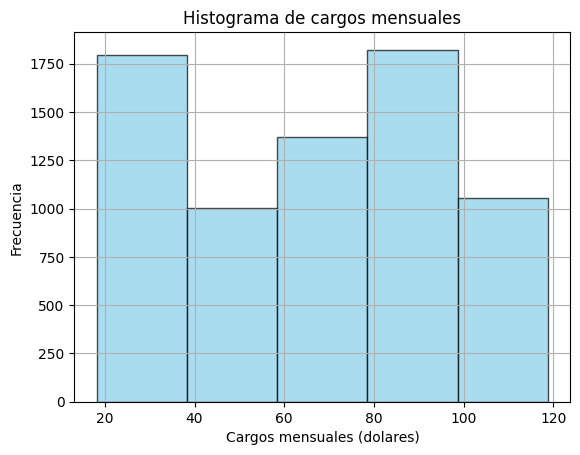

In [8]:

plt.figure(figsize=(16, 13))
plt.hist(df['MonthlyCharges'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histograma de cargos mensuales")
plt.xlabel("Cargos mensuales (dolares)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


Observamos que no hay sesgo en los cargos mensuales, tenemos datos de ambos lados (cuentas entre 20 a 40 dolares asi como 60 a 80) coinciden con la media

C:\Users\Ivan\AppData\Local\Temp\ipykernel_9736\3408410716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Contract', palette='viridis')


Text(0, 0.5, 'Cantidad de Clientes')

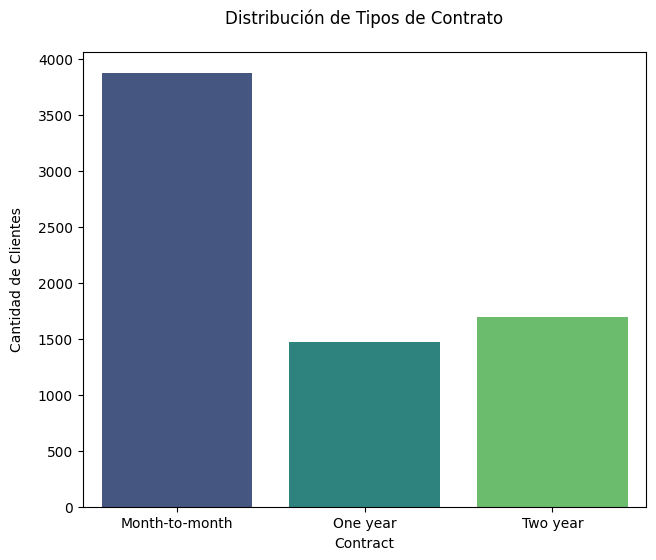

In [22]:

plt.figure(figsize=(16, 13))
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Contract', palette='viridis')
plt.title('Distribución de Tipos de Contrato', pad=20)
plt.ylabel('Cantidad de Clientes', labelpad=10)

Observamos que la cantidad de clientes que paga una cuota mensual es ampliamente superior a las otras modalidades de contrato, siendo la menor los contratos de renovacion anual, este resultado es algo esperado, debido a que generalmente las cuotas mensuales son comunes a la hora de adquirir deudas por algun producto/servicio

2. Multivariadas

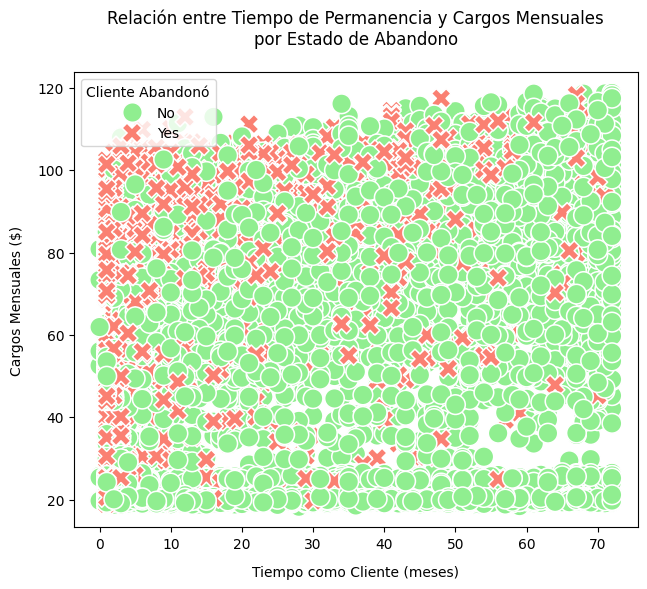

In [31]:
plt.figure(figsize=(16, 13))
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', 
                style='Churn', s=200,
                palette={'No': 'lightgreen', 'Yes': 'salmon'})
plt.title('Relación entre Tiempo de Permanencia y Cargos Mensuales\npor Estado de Abandono', pad=20)
plt.xlabel('Tiempo como Cliente (meses)', labelpad=10)
plt.ylabel('Cargos Mensuales ($)', labelpad=10)
plt.legend(title='Cliente Abandonó')

Se observa que a mayor precio (mas de 60 dolares) de contrato, la gente tiende a cancelar antes del primer anho, esto nos puede indicar que una buena estrategia de mkt podria ser ofrecer planes cargos mensuales bajos e ir escalando el precio anualmente, de manera a que luego de unos anhos, se pueda llegar a un cargo mensual alto. Ademas eso evidencia que los clientes tienden a quedarse solo cuando los precios al inicio son bajos y el servicio bueno

Text(0, 0.5, 'Cargos Mensuales (dolares)')

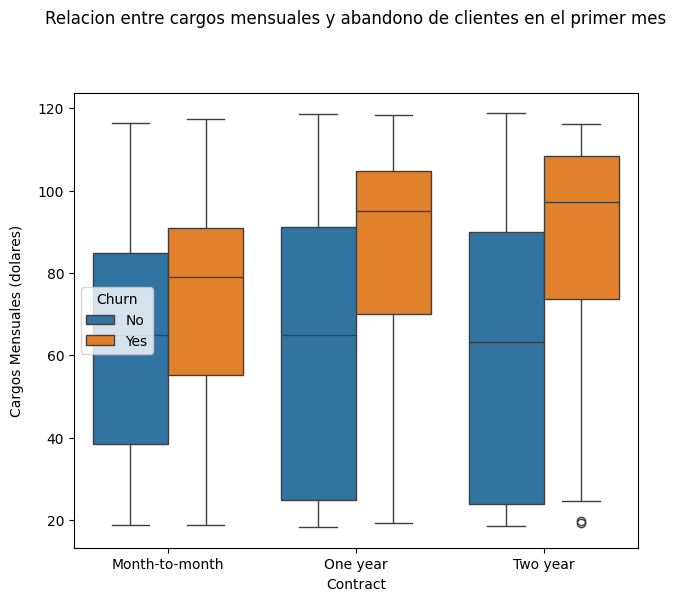

In [32]:
plt.figure(figsize=(16, 13))
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Relacion entre cargos mensuales y abandono de clientes en el primer mes', pad=50)
plt.ylabel('Cargos Mensuales (dolares)', labelpad=10)

Observamos que en todas las modalidades de contrato, los clientes tienden a abandonar al primer mes si el precio de sus contratos es mayor a la media (60 dolares aprox.), nuevamente podemos concluir que para fidelizar a los clientes, es necesario ofrecerles cuotas bajas, buen servicio y beneficios